In [ ]:
!pip install category_encoders
!pip install polars
!pip install imbalanced-learn
!pip install dask
!pip install dask-ml
!pip install lightgbm
!pip install catboost
!pip install ydata_profiling
!pip install dtale
!pip install feature-engine
!pip install dython
!pip install yellowbrick

  Using cached dask_ml-2024.4.4-py3-none-any.whl.metadata (5.9 kB)
  Using cached dask_glm-0.3.2-py2.py3-none-any.whl.metadata (1.5 kB)
  Using cached distributed-2024.11.2-py3-none-any.whl.metadata (3.3 kB)
  Using cached multipledispatch-1.0.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached sparse-0.15.4-py2.py3-none-any.whl.metadata (4.5 kB)
  Using cached dask_expr-1.1.19-py3-none-any.whl.metadata (2.6 kB)
  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)
  Using cached tblib-3.0.0-py3-none-any.whl.metadata (25 kB)
  Using cached zict-3.0.0-py2.py3-none-any.whl.metadata (899 bytes)
Using cached dask_ml-2024.4.4-py3-none-any.whl (149 kB)
Using cached dask_glm-0.3.2-py2.py3-none-any.whl (13 kB)
Using cached distributed-2024.11.2-py3-none-any.whl (1.0 MB)
Using cached multipledispatch-1.0.0-py3-none-any.whl (12 kB)
Using cached dask_expr-1.1.19-py3-none-any.whl (244 kB)
Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
Using cached sparse-0.1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
import polars as pl
import dask.dataframe as dd
import dask.array as da
import re
from time import time
from category_encoders import TargetEncoder
from category_encoders.woe import WOEEncoder
from category_encoders.quantile_encoder import QuantileEncoder , SummaryEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.leave_one_out import LeaveOneOutEncoder
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.cat_boost import CatBoostEncoder
from sklearn.preprocessing import FunctionTransformer , SplineTransformer , StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from feature_engine.creation import MathFeatures , DecisionTreeFeatures
from feature_engine.encoding import RareLabelEncoder
from sklearn.impute import SimpleImputer
from category_encoders import JamesSteinEncoder , TargetEncoder , CatBoostEncoder , WOEEncoder , MEstimateEncoder , HelmertEncoder , LeaveOneOutEncoder , BinaryEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler , PowerTransformer , QuantileTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from yellowbrick.features import Manifold , radviz
from yellowbrick.datasets import load_occupancy
from sklearn.feature_selection import SelectPercentile,f_classif , SelectFdr , SelectFpr
from sklearn.metrics import roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
#pd.set_option('future.no_silent_downcasting', True)

In [ ]:
from google.colab import drive
drive.mount ('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
%time df=pd.read_csv('/content/drive/My Drive/analytics_vidya/kaggle/depression/train.csv')
%time df_test=pd.read_csv('/content/drive/My Drive/analytics_vidya/kaggle/depression/test.csv')

CPU times: user 216 ms, sys: 62.4 ms, total: 278 ms
Wall time: 953 ms
CPU times: user 140 ms, sys: 18.9 ms, total: 159 ms
Wall time: 429 ms


In [ ]:
df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [ ]:
%time df_pl=pl.read_csv('/content/drive/My Drive/analytics_vidya/kaggle/depression/train.csv')
%time df_test_pl=pl.read_csv('/content/drive/My Drive/analytics_vidya/kaggle/depression/test.csv')

CPU times: user 1.07 s, sys: 293 ms, total: 1.36 s
Wall time: 302 ms
CPU times: user 1.33 s, sys: 419 ms, total: 1.75 s
Wall time: 485 ms


In [ ]:
%time df_dd = dd.read_csv('/content/drive/My Drive/analytics_vidya/kaggle/depression/train.csv' )
%time df_test_dd = dd.read_csv('/content/drive/My Drive/analytics_vidya/kaggle/depression/test.csv')

CPU times: user 18.2 ms, sys: 2.32 ms, total: 20.6 ms
Wall time: 22.5 ms
CPU times: user 13.9 ms, sys: 1.81 ms, total: 15.7 ms
Wall time: 17.7 ms


In [ ]:
%time df = df.drop(['id','Name'],axis=1)
%time df_test1 = df_test.drop(['id','Name'],axis=1)

%time df_pl = df_pl.drop(['id','Name'])
%time df_test_pl1 = df_test_pl.drop(['id','Name'])

%time df_dd = df_dd.drop(['id','Name'],axis=1)
%time df_test_dd1 = df_test_dd.drop(['id','Name'],axis=1)

CPU times: user 9.63 ms, sys: 0 ns, total: 9.63 ms
Wall time: 9.26 ms
CPU times: user 6.23 ms, sys: 0 ns, total: 6.23 ms
Wall time: 5.71 ms
CPU times: user 2.36 ms, sys: 1.36 ms, total: 3.72 ms
Wall time: 3.64 ms
CPU times: user 120 µs, sys: 0 ns, total: 120 µs
Wall time: 135 µs
CPU times: user 912 µs, sys: 0 ns, total: 912 µs
Wall time: 903 µs
CPU times: user 731 µs, sys: 0 ns, total: 731 µs
Wall time: 725 µs


Gender
Male      77464
Female    63236
Name: count, dtype: int64
City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Kagan             1
Armaan            1
Ithal             1
Jhanvi            1
Unirar            1
Name: count, Length: 98, dtype: int64
Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64
Profession
Teacher           24906
Content Writer     7814
Architect          4370
Consultant         4229
HR Manager         4022
                  ...  
Moderate              1
Analyst               1
Pranav                1
Visakhapatnam         1
Yuvraj                1
Name: count, Length: 64, dtype: int64
Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
4-6 hours                5
2-3 hour

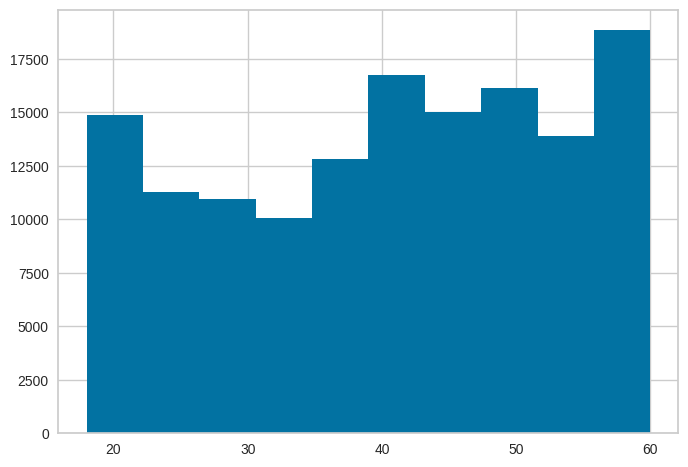

Academic Pressure


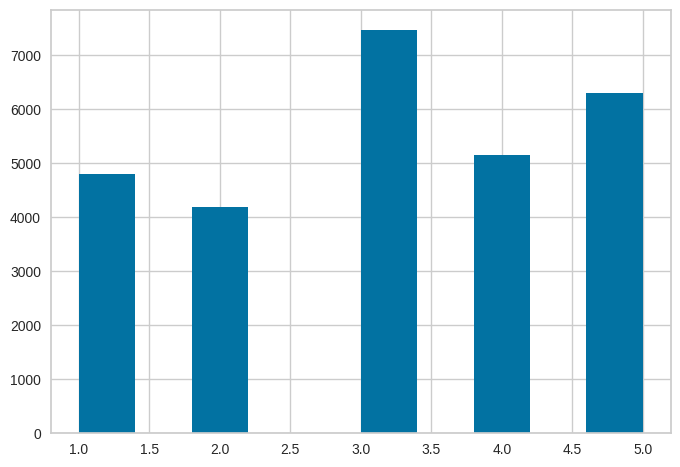

Work Pressure


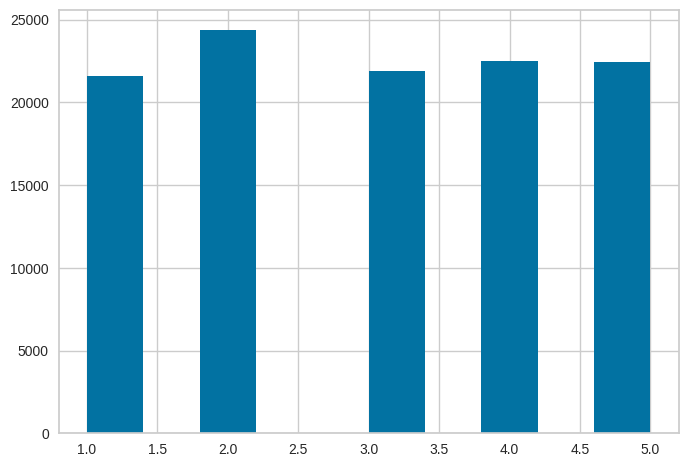

CGPA


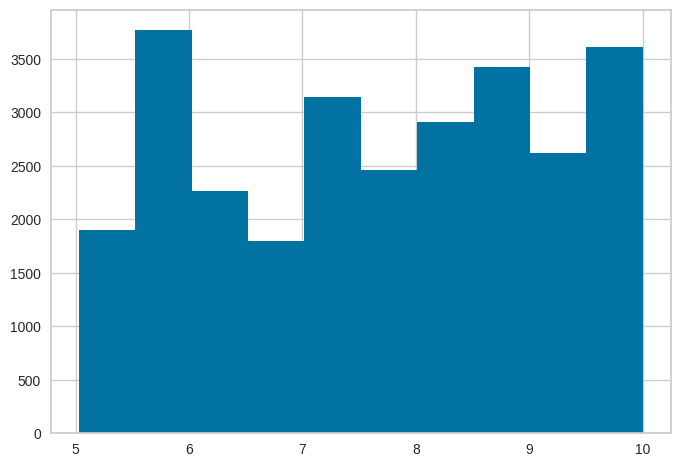

Study Satisfaction


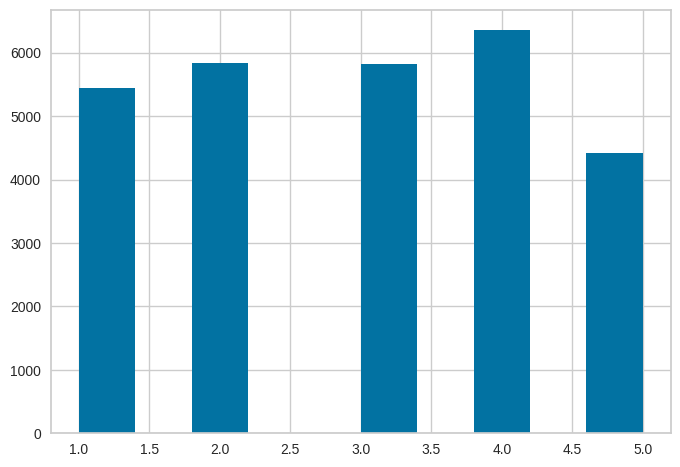

Job Satisfaction


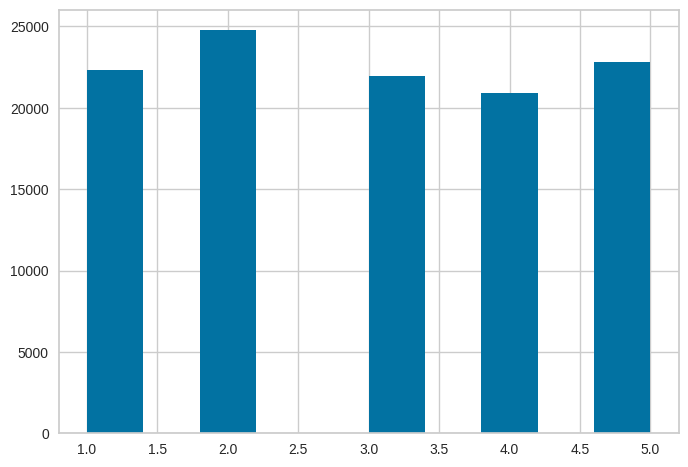

Work/Study Hours


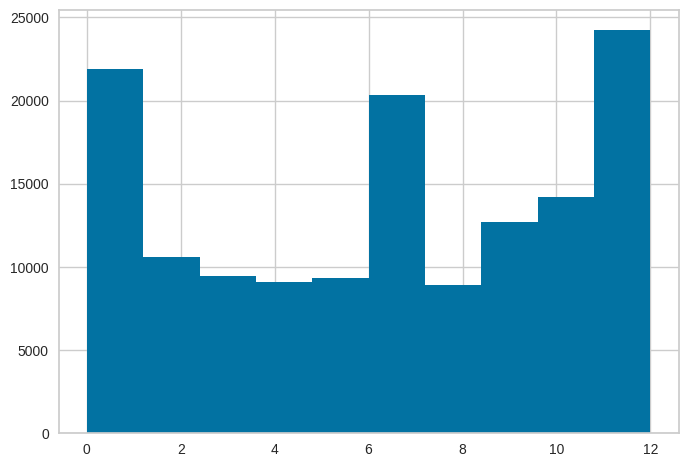

Financial Stress


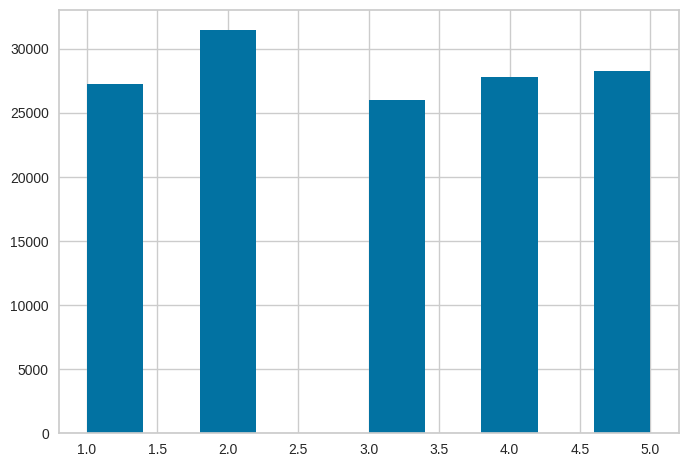

Depression


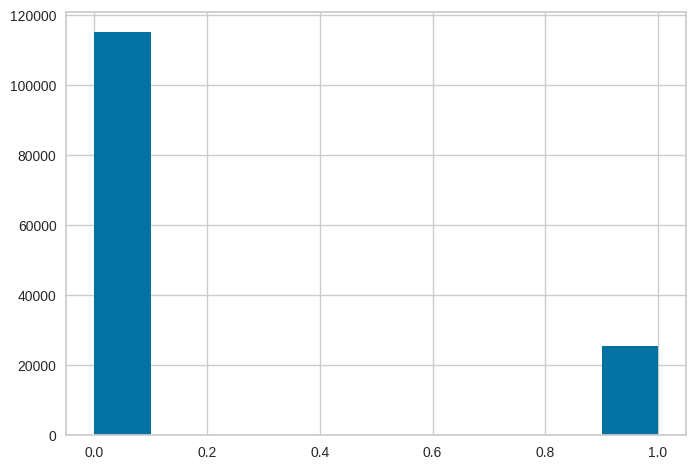

In [ ]:
cat = df.select_dtypes(include='object')
Num = df.select_dtypes(exclude='object')
for c in cat.columns:
  print(df[c].value_counts())
for n in Num.columns:
  print(n)
  df[n].hist()
  plt.show()

#Academic Pressure , Work Pressure, Study Satisfaction, Job Satisfaction,Work/Study Hours,Financial Stress

In [ ]:
df_pl.head()

Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
str,f64,str,str,str,f64,f64,f64,f64,f64,str,str,str,str,f64,f64,str,i64
"""Female""",49.0,"""Ludhiana""","""Working Professional""","""Chef""",null,5.0,null,null,2.0,"""More than 8 hours""","""Healthy""","""BHM""","""No""",1.0,2.0,"""No""",0
"""Male""",26.0,"""Varanasi""","""Working Professional""","""Teacher""",null,4.0,null,null,3.0,"""Less than 5 hours""","""Unhealthy""","""LLB""","""Yes""",7.0,3.0,"""No""",1
"""Male""",33.0,"""Visakhapatnam""","""Student""",null,5.0,null,8.97,2.0,null,"""5-6 hours""","""Healthy""","""B.Pharm""","""Yes""",3.0,1.0,"""No""",1
"""Male""",22.0,"""Mumbai""","""Working Professional""","""Teacher""",null,5.0,null,null,1.0,"""Less than 5 hours""","""Moderate""","""BBA""","""Yes""",10.0,1.0,"""Yes""",1
"""Female""",30.0,"""Kanpur""","""Working Professional""","""Business Analyst""",null,1.0,null,null,1.0,"""5-6 hours""","""Unhealthy""","""BBA""","""Yes""",9.0,4.0,"""Yes""",0


In [ ]:
(df_pl.null_count()/len(df_pl))*100

Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,26.034115,80.172708,19.842217,80.171997,80.172708,19.836532,0.0,0.002843,0.001421,0.0,0.0,0.002843,0.0,0.0


In [ ]:
df_pl['Degree'].value_counts(sort=True)

Degree,count
str,u32
"""Class 12""",14729
"""B.Ed""",11691
"""B.Arch""",8742
"""B.Com""",8113
"""B.Pharm""",5856
…,…
"""LCA""",1
"""B B.Com""",1
"""RCA""",1


In [ ]:
%time

def fillna_sub(df):
  df['Academic Pressure'] = df['Academic Pressure'].fillna(0)
  df['Work Pressure'] = df['Work Pressure'].fillna(0)
  df['Study Satisfaction'] = df['Study Satisfaction'].fillna(0)
  df['Job Satisfaction'] = df['Job Satisfaction'].fillna(0)
  df['Work/Study Hours'] = df['Work/Study Hours'].fillna(0)
  df['Financial Stress'] = df['Financial Stress'].fillna(0)
  df['CGPA'] = df['CGPA'].fillna(0)

  df['Profession'] = df['Profession'].fillna('others')
  profession_counts = df['Profession'].value_counts()
  df['Profession'] = df['Profession'].apply(lambda x: x if profession_counts[x] >= 750 else 'misc')

  df['Degree'] = df['Degree'].fillna('others')
  degree_counts = df['Degree'].value_counts()
  df['Degree'] = df['Degree'].apply(lambda x: x if degree_counts[x] >= 1000 else 'others')

  df['Dietary Habits'] = df['Dietary Habits'].fillna('others')
  diet_habits_counts = df['Dietary Habits'].value_counts()
  df['Dietary Habits'] = df['Dietary Habits'].apply(lambda x: x if diet_habits_counts[x] >= 10 else 'others')

  city_counts = df['City'].value_counts()
  df['City'] = df['City'].apply(lambda x: x if city_counts[x] >= 1000 else 'others')

  df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x:x if x in ['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours'] else 'others')
  return df

df = fillna_sub(df)
df_test1 = fillna_sub(df_test1)

CPU times: user 30 µs, sys: 17 µs, total: 47 µs
Wall time: 31 µs


In [ ]:
%time

def fillna_sub(df_dd):
    df_dd['Academic Pressure'] = df_dd['Academic Pressure'].fillna('0')
    df_dd['Work Pressure'] = df_dd['Work Pressure'].fillna('0')
    df_dd['Study Satisfaction'] = df_dd['Study Satisfaction'].fillna('0')
    df_dd['Job Satisfaction'] = df_dd['Job Satisfaction'].fillna('0')
    df_dd['Work/Study Hours'] = df_dd['Work/Study Hours'].fillna('0')
    df_dd['Financial Stress'] = df_dd['Financial Stress'].fillna('0')
    df_dd['CGPA'] = df_dd['CGPA'].fillna(0)

    df_dd['Profession'] = df_dd['Profession'].fillna('others')
    profession_counts = df_dd['Profession'].value_counts().compute()
    df_dd['Profession'] = df_dd['Profession'].map(lambda x: x if profession_counts[x] >= 750 else 'misc', meta=('Profession', 'object'))

    df_dd['Degree'] = df_dd['Degree'].fillna('others')
    degree_counts = df_dd['Degree'].value_counts().compute()
    df_dd['Degree'] = df_dd['Degree'].map(lambda x: x if degree_counts[x] >= 1000 else 'others', meta=('Degree', 'object'))

    df_dd['Dietary Habits'] = df_dd['Dietary Habits'].fillna('others')
    diet_habits_counts = df_dd['Dietary Habits'].value_counts().compute()
    df_dd['Dietary Habits'] = df_dd['Dietary Habits'].map(lambda x: x if diet_habits_counts[x] >= 10 else 'others', meta=('Dietary Habits', 'object'))

    city_counts = df_dd['City'].value_counts().compute()
    df_dd['City'] = df_dd['City'].map(lambda x: x if city_counts[x] >= 1000 else 'others', meta=('City', 'object'))

    df_dd['Sleep Duration'] = df_dd['Sleep Duration'].map(lambda x: x if x in ['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours'] else 'others'  ,meta=('Sleep Duration', 'object'))

    return df_dd

df_dd = fillna_sub(df_dd)
df_test_dd = fillna_sub(df_test_dd)


CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 36 µs


In [ ]:

columns_to_cast = ['Academic Pressure' , 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']

%time df[columns_to_cast] = df[columns_to_cast].astype('object')
%time df_test1[columns_to_cast] = df_test1[columns_to_cast].astype('object')

%time df_dd[columns_to_cast] = df_dd[columns_to_cast].astype('object')
%time df_test_dd[columns_to_cast] = df_test_dd[columns_to_cast].astype('object')

CPU times: user 25.9 ms, sys: 10.6 ms, total: 36.5 ms
Wall time: 35.9 ms
CPU times: user 13.1 ms, sys: 11.1 ms, total: 24.1 ms
Wall time: 23.9 ms
CPU times: user 4.36 ms, sys: 34 µs, total: 4.4 ms
Wall time: 4.28 ms
CPU times: user 4.07 ms, sys: 0 ns, total: 4.07 ms
Wall time: 4.04 ms


In [ ]:
df_pl = pl.from_pandas(df)
df_test_pl = pl.from_pandas(df_test1)

In [ ]:
df_pl.null_count()

Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.00,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.00,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,others,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.00,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.00,0.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


**EDA**

<Axes: ylabel='Age'>

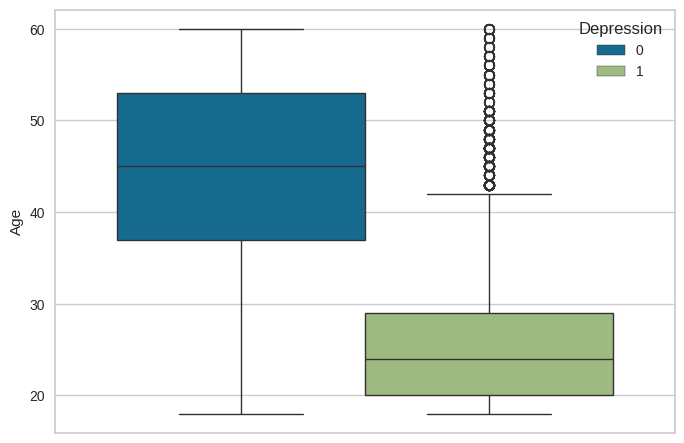

In [ ]:
sns.boxplot(data =df ,y='Age' , hue='Depression')

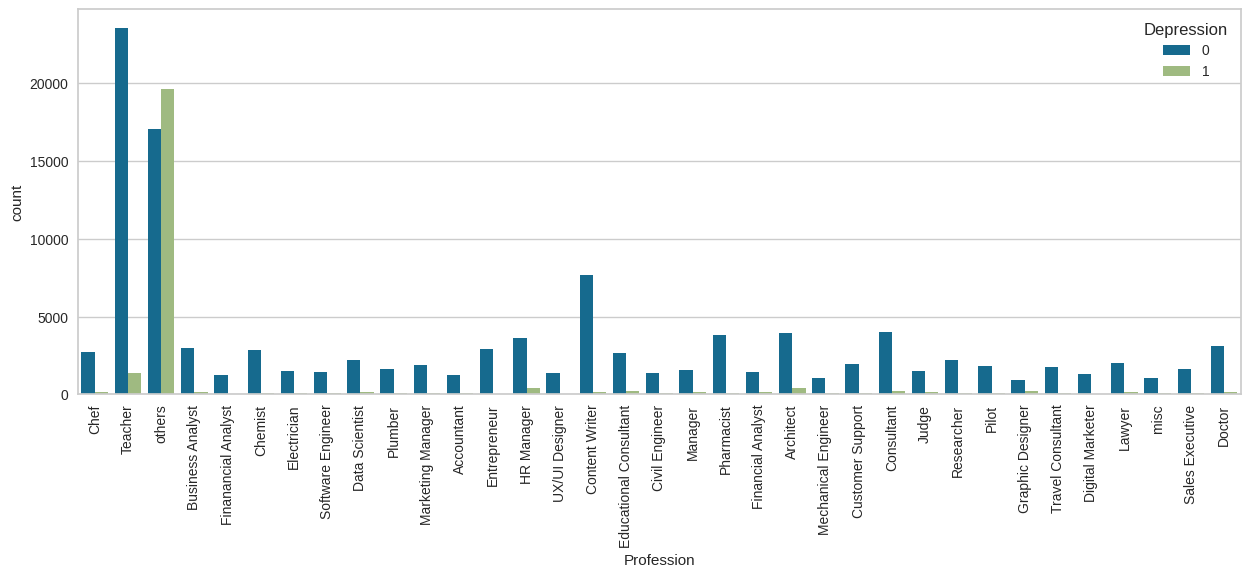

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Profession',hue='Depression')
plt.xticks(rotation=90)
plt.show()

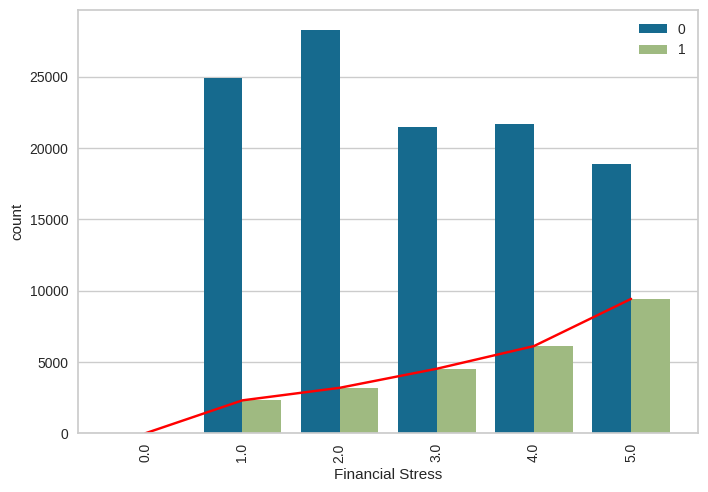

In [ ]:
sns.countplot(data=df,x='Financial Stress',hue='Depression')
dep_fin = df.groupby(['Financial Stress','Depression']).size().reset_index(name='count')

dep_fin_1 = dep_fin[dep_fin['Depression']==1]
sns.lineplot(data=dep_fin_1,x='Financial Stress',y='count' , color='red')

plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Job Satisfaction', ylabel='count'>

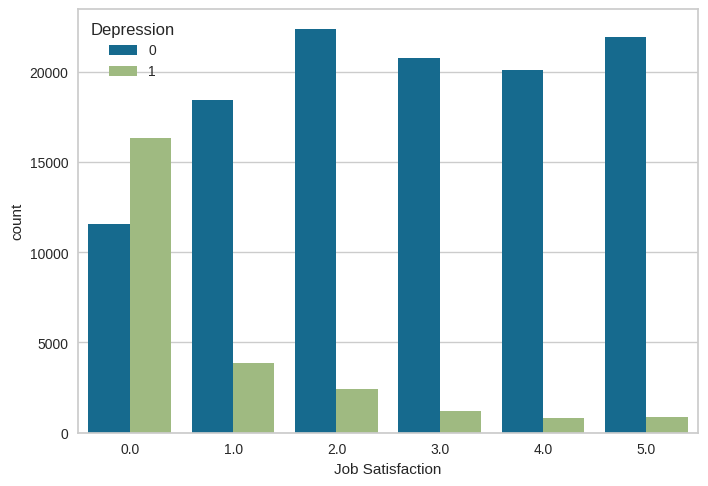

In [ ]:
sns.countplot(data=df,x='Job Satisfaction',hue='Depression')

<Axes: xlabel='Dietary Habits', ylabel='Sleep Duration'>

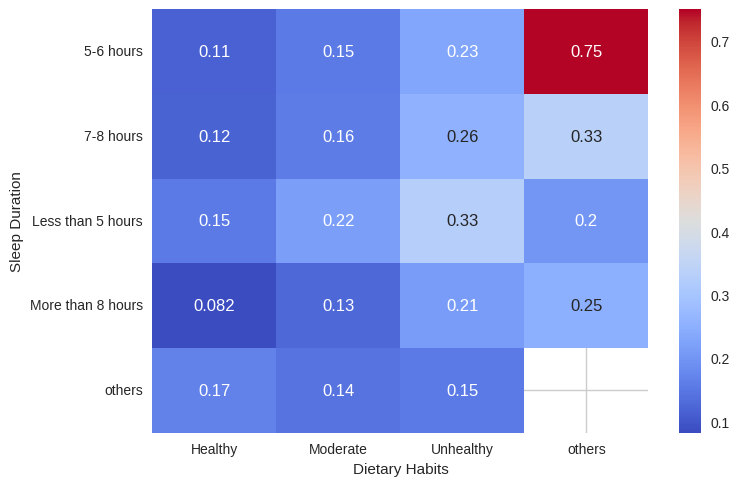

In [ ]:
sleep_diet = pd.pivot_table(df,index='Sleep Duration',columns='Dietary Habits',values='Depression', aggfunc='mean') # Use pivot_table instead of pivot

sns.heatmap(data=sleep_diet,annot=True,cmap='coolwarm')

<Axes: xlabel='Academic Pressure', ylabel='Study Satisfaction'>

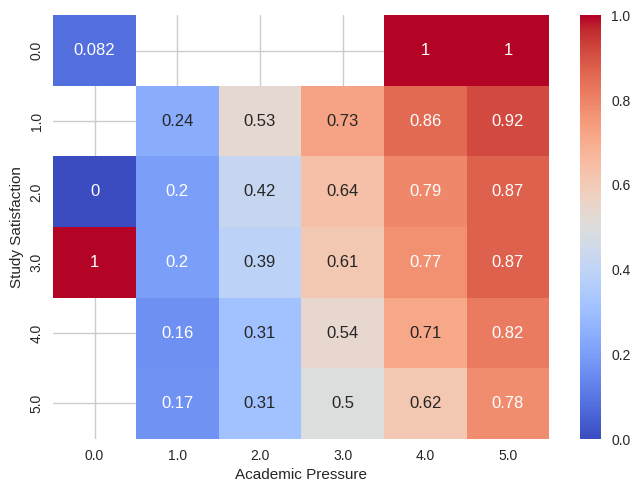

In [ ]:
study_aca = pd.pivot_table(df,index='Study Satisfaction',columns='Academic Pressure',values='Depression', aggfunc='mean') # Use pivot_table instead of pivot

sns.heatmap(data=study_aca,annot=True,cmap='coolwarm')

<Axes: xlabel='Job Satisfaction', ylabel='Profession'>

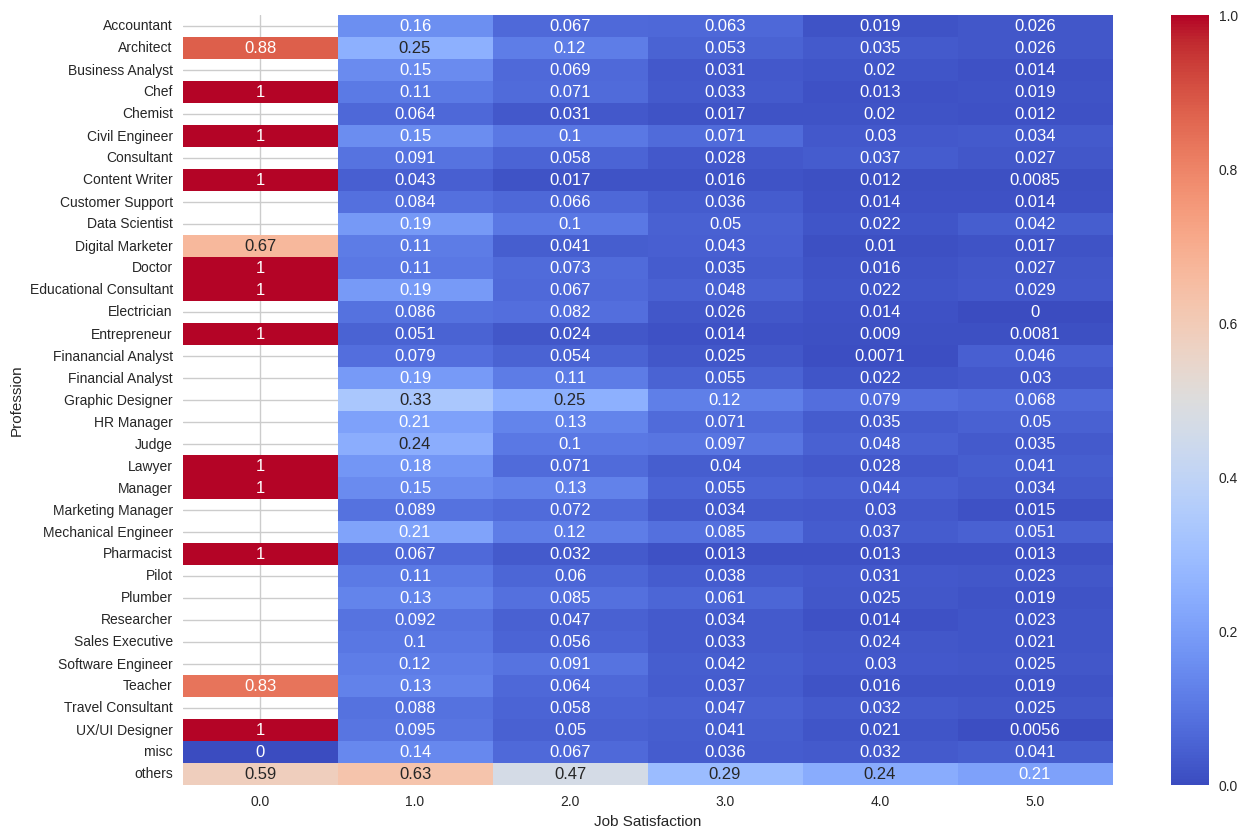

In [ ]:
pro_job = pd.pivot_table(df,index='Profession',columns='Job Satisfaction',values='Depression', aggfunc='mean') # Use pivot_table instead of pivot
plt.figure(figsize=(15,10))
sns.heatmap(data=pro_job,annot=True,cmap='coolwarm')

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='count'>

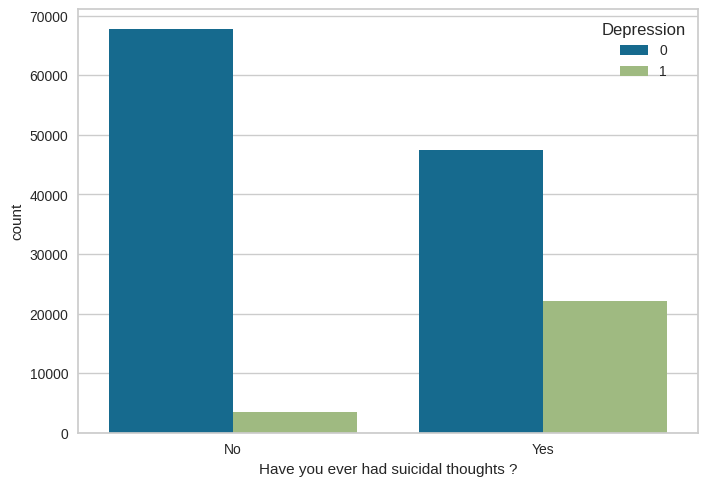

In [ ]:
sns.countplot(data=df,x='Have you ever had suicidal thoughts ?',hue='Depression')

<Axes: xlabel='Family History of Mental Illness', ylabel='count'>

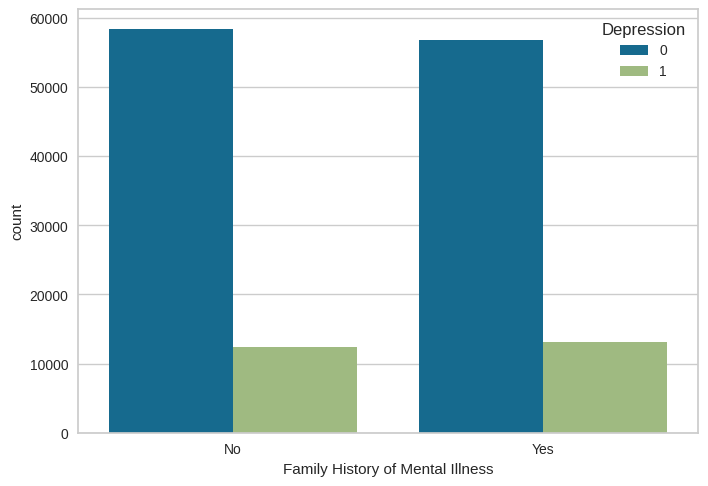

In [ ]:
sns.countplot(data=df,x='Family History of Mental Illness',hue='Depression')

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='Profession'>

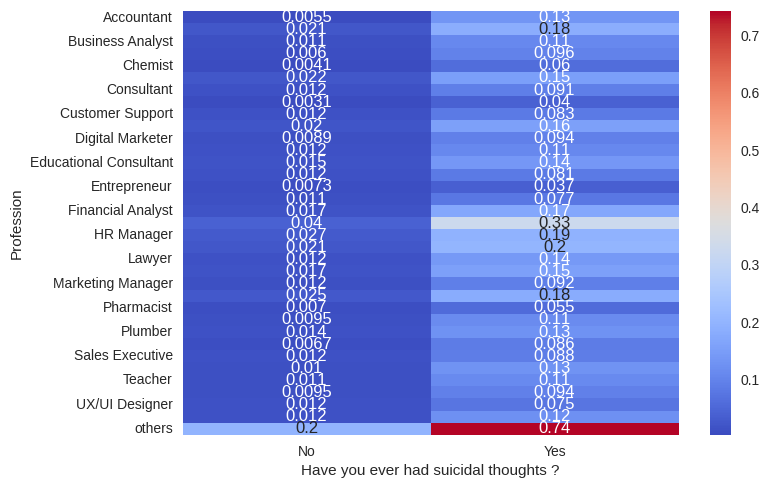

In [ ]:
job_suici = pd.pivot_table(df,index='Profession',columns='Have you ever had suicidal thoughts ?',values='Depression', aggfunc='mean') # Use pivot_table instead of pivot

sns.heatmap(data=job_suici,annot=True,cmap='coolwarm')

<Axes: xlabel='Have you ever had suicidal thoughts ?', ylabel='Degree'>

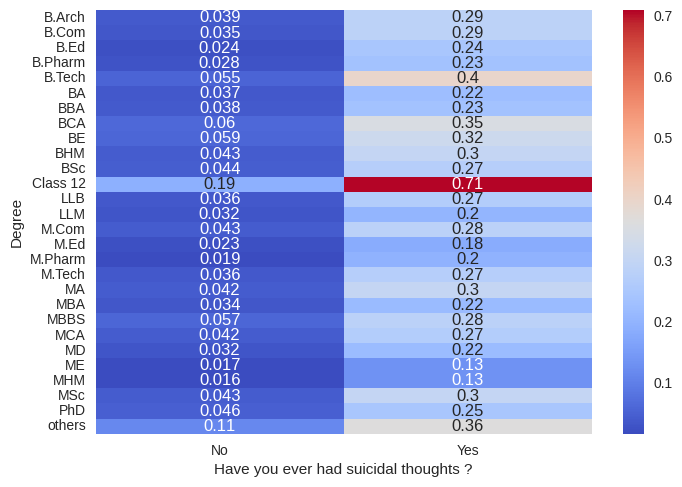

In [ ]:
deg_job = pd.pivot_table(df,index='Degree',columns='Have you ever had suicidal thoughts ?',values='Depression', aggfunc='mean') # Use pivot_table instead of pivot

sns.heatmap(data=deg_job,annot=True,cmap='coolwarm')

In [ ]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)

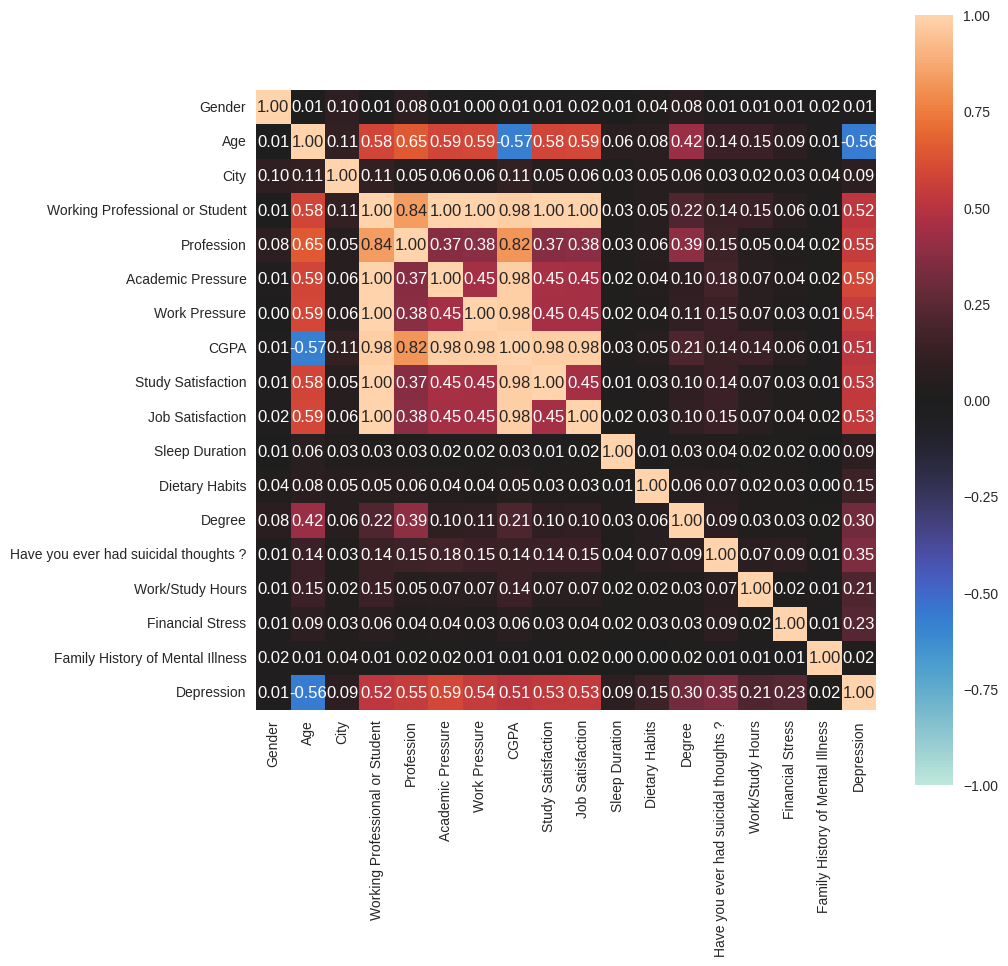

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
Gender,1.00,0.01,0.10,0.01,0.08,0.01,0.00,0.01,0.01,0.02,0.01,0.04,0.08,0.01,0.01,0.01,0.02,0.01
Age,0.01,1.00,0.11,0.58,0.65,0.59,0.59,-0.57,0.58,0.59,0.06,0.08,0.42,0.14,0.15,0.09,0.01,-0.56
City,0.10,0.11,1.00,0.11,0.05,0.06,0.06,0.11,0.05,0.06,0.03,0.05,0.06,0.03,0.02,0.03,0.04,0.09
Working Professional or Student,0.01,0.58,0.11,1.00,0.84,1.00,1.00,0.98,1.00,1.00,0.03,0.05,0.22,0.14,0.15,0.06,0.01,0.52
Profession,0.08,0.65,0.05,0.84,1.00,0.37,0.38,0.82,0.37,0.38,0.03,0.06,0.39,0.15,0.05,0.04,0.02,0.55
Academic Pressure,0.01,0.59,0.06,1.00,0.37,1.00,0.45,0.98,0.45,0.45,0.02,0.04,0.10,0.18,0.07,0.04,0.02,0.59
Work Pressure,0.00,0.59,0.06,1.00,0.38,0.45,1.00,0.98,0.45,0.45,0.02,0.04,0.11,0.15,0.07,0.03,0.01,0.54
CGPA,0.01,-0.57,0.11,0.98,0.82,0.98,0.98,1.00,0.98,0.98,0.03,0.05,0.21,0.14,0.14,0.06,0.01,0.51
Study Satisfaction,0.01,0.58,0.05,1.00,0.37,0.45,0.45,0.98,1.00,0.45,0.01,0.03,0.10,0.14,0.07,0.03,0.01,0.53
Job Satisfaction,0.02,0.59,0.06,1.00,0.38,0.45,0.45,0.98,0.45,1.00,0.02,0.03,0.10,0.15,0.07,0.04,0.02,0.53


In [ ]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
styled_df = df_complete_corr.dropna(axis=1, how='all').dropna(axis=0, how='all').style.background_gradient(cmap='coolwarm', axis=None)
styled_df.format(precision=2)

# Display the styled DataFrame
styled_df

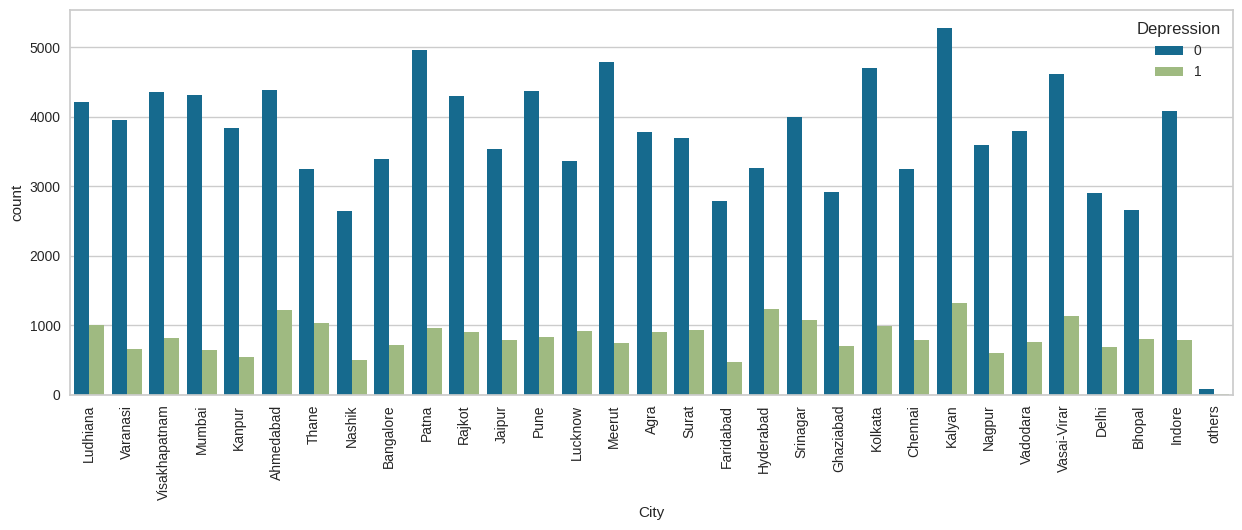

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data =df,x='City',hue='Depression')
plt.xticks(rotation=90)
plt.show()

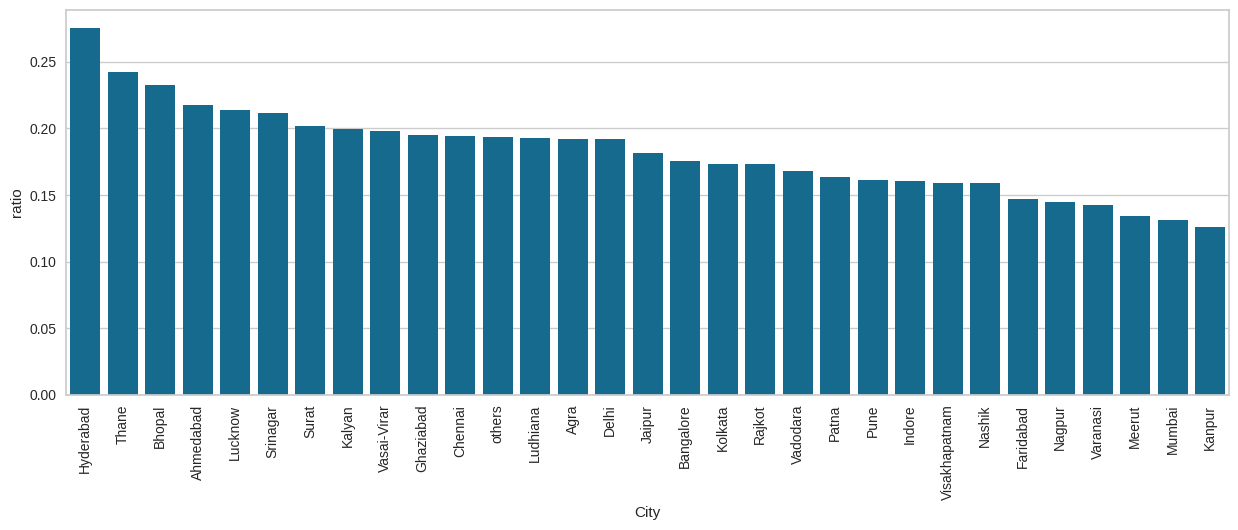

In [ ]:
city_dep = df.groupby(['City','Depression']).size().reset_index(name='count')
total_counts = city_dep.groupby('City')['count'].transform('sum')

# Calculate the ratio
city_dep['ratio'] = city_dep['count'] / total_counts

city_dep_1 = city_dep[city_dep['Depression']==1].sort_values(by='ratio',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=city_dep_1,x='City',y='ratio' )

plt.xticks(rotation=90)
plt.show()

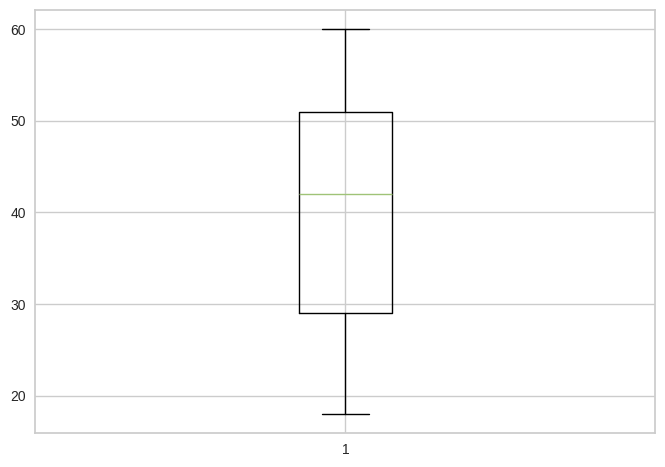

In [ ]:
plt.boxplot(df['Age'])
plt.show()

<Axes: ylabel='count'>

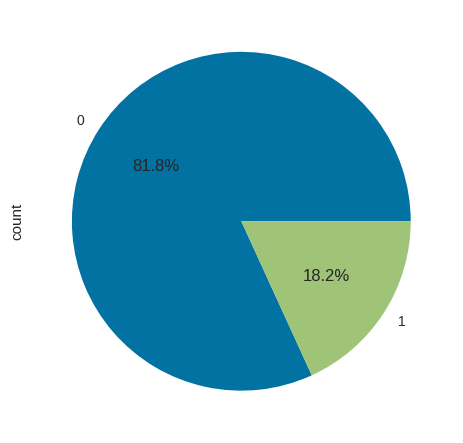

In [ ]:
df['Depression'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
df.columns

Index(['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
df1_x = df[['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness']]

df1_y = df['Depression']

df_dd_x = df_dd[['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness']]

df_dd_y = df_dd['Depression']

In [ ]:
len(df_test1.columns) , len(df1_x.columns)

(17, 17)

In [ ]:
df_test1_x = df_test1[['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness']]

df_dd_test_x = df_test_dd[['Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness']]

In [ ]:
cat= df1_x.select_dtypes(include='object')
num = df1_x.select_dtypes(exclude='object')

cat_dd = df_dd_x.select_dtypes(include='object')
num_dd = df_dd_x.select_dtypes(exclude='object')

In [ ]:
cat_test = df_test1_x.select_dtypes(include='object')
num_test = df_test1_x.select_dtypes(exclude='object')

cat_dd_test = df_dd_test_x.select_dtypes(include='object')
num_dd_test = df_dd_test_x.select_dtypes(exclude='object')

In [ ]:
jt = JamesSteinEncoder()
df_cat_encode = jt.fit_transform(cat,df1_y, handle_unknown = 0.05 , handle_missing = -1)
ss = StandardScaler()
num_encode = ss.fit_transform(num)
df_num_encode = pd.DataFrame(num_encode,columns=num.columns)
df_encode = pd.concat([df_num_encode,df_cat_encode],axis=1)
#df_ss = ss.fit_transform(df_encode)
#df_1 = pd.DataFrame(df_ss,columns=df_encode.columns)
df_1 = df_encode

In [ ]:
df_test_cat_encode = jt.transform(cat_test)
test_num_encode = ss.transform(num_test)
df_test_num_encode = pd.DataFrame(test_num_encode,columns=num_test.columns)
df_test_encode = pd.concat([df_test_num_encode,df_test_cat_encode],axis=1)

In [ ]:
df_encode.head()

,Age,CGPA,Gender,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0.695360,-0.486345,0.178237,0.187451,0.081836,0.078285,0.101950,0.191667,0.101967,0.117022,0.148279,0.126776,0.176729,0.048610,0.106607,0.119734,0.175387
1,-1.161867,-0.486345,0.184550,0.158825,0.081836,0.086633,0.101950,0.122643,0.101967,0.074128,0.220176,0.245710,0.163951,0.317832,0.190332,0.176404,0.175387
2,-0.596624,2.386461,0.184550,0.169153,0.585499,0.326859,0.679048,0.435246,0.476730,0.435238,0.169463,0.126776,0.143153,0.317832,0.136093,0.104897,0.175387
3,-1.484863,-0.486345,0.184550,0.151723,0.081836,0.086633,0.101950,0.191667,0.101967,0.176294,0.220176,0.168219,0.153628,0.317832,0.251937,0.104897,0.188113
4,-0.838871,-0.486345,0.178237,0.147948,0.081836,0.087751,0.101950,0.034800,0.101967,0.176294,0.169463,0.245710,0.153628,0.317832,0.169880,0.207828,0.188113


In [ ]:
df_1.columns

Index(['Age', 'CGPA', 'Gender', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')

In [ ]:
from feature_engine.creation import MathFeatures


# Create new features by adding, subtracting, multiplying, and dividing existing features
arithmetic = MathFeatures(
    variables=['Age', 'CGPA', 'Gender', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
    func=['sum', 'prod', 'mean', 'std'],
    missing_values='ignore'
)

df_arithmetic = arithmetic.fit_transform(df_1)

In [ ]:
df_arithmetic.head()

,Age,CGPA,Gender,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,sum_Age_CGPA_Gender_City_Working Professional or Student_Profession_Academic Pressure_Work Pressure_Study Satisfaction_Job Satisfaction_Sleep Duration_Dietary Habits_Degree_Have you ever had suicidal thoughts ?_Work/Study Hours_Financial Stress_Family History of Mental Illness,prod_Age_CGPA_Gender_City_Working Professional or Student_Profession_Academic Pressure_Work Pressure_Study Satisfaction_Job Satisfaction_Sleep Duration_Dietary Habits_Degree_Have you ever had suicidal thoughts ?_Work/Study Hours_Financial Stress_Family History of Mental Illness,mean_Age_CGPA_Gender_City_Working Professional or Student_Profession_Academic Pressure_Work Pressure_Study Satisfaction_Job Satisfaction_Sleep Duration_Dietary Habits_Degree_Have you ever had suicidal thoughts ?_Work/Study Hours_Financial Stress_Family History of Mental Illness,std_Age_CGPA_Gender_City_Working Professional or Student_Profession_Academic Pressure_Work Pressure_Study Satisfaction_Job Satisfaction_Sleep Duration_Dietary Habits_Degree_Have you ever had suicidal thoughts ?_Work/Study Hours_Financial Stress_Family History of Mental Illness
0,0.695360,-0.486345,0.178237,0.187451,0.081836,0.078285,0.101950,0.191667,0.101967,0.117022,0.148279,0.126776,0.176729,0.048610,0.106607,0.119734,0.175387,2.149550,-6.101906e-15,0.126444,0.213209
1,-1.161867,-0.486345,0.184550,0.158825,0.081836,0.086633,0.101950,0.122643,0.101967,0.074128,0.220176,0.245710,0.163951,0.317832,0.190332,0.176404,0.175387,0.754112,1.842270e-13,0.044360,0.353790
2,-0.596624,2.386461,0.184550,0.169153,0.585499,0.326859,0.679048,0.435246,0.476730,0.435238,0.169463,0.126776,0.143153,0.317832,0.136093,0.104897,0.175387,6.255762,-1.276666e-09,0.367986,0.589241
3,-1.484863,-0.486345,0.184550,0.151723,0.081836,0.086633,0.101950,0.191667,0.101967,0.176294,0.220176,0.168219,0.153628,0.317832,0.251937,0.104897,0.188113,0.510213,4.527277e-13,0.030013,0.425528
4,-0.838871,-0.486345,0.178237,0.147948,0.081836,0.087751,0.101950,0.034800,0.101967,0.176294,0.169463,0.245710,0.153628,0.317832,0.169880,0.207828,0.188113,1.038022,6.653346e-14,0.061060,0.287134


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=3)
df_poly = pf.fit_transform(df_1)
df_poly1 = pd.DataFrame(df_poly,columns=pf.get_feature_names_out())

In [ ]:
df_test_poly_1 = pf.transform(df_test_encode)
df_poly1.head()

,1,Age,CGPA,Gender,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Age^2,Age CGPA,Age Gender,Age City,Age Working Professional or Student,Age Profession,Age Academic Pressure,Age Work Pressure,Age Study Satisfaction,Age Job Satisfaction,Age Sleep Duration,Age Dietary Habits,Age Degree,Age Have you ever had suicidal thoughts ?,Age Work/Study Hours,Age Financial Stress,Age Family History of Mental Illness,CGPA^2,CGPA Gender,CGPA City,CGPA Working Professional or Student,CGPA Profession,CGPA Academic Pressure,CGPA Work Pressure,CGPA Study Satisfaction,CGPA Job Satisfaction,CGPA Sleep Duration,CGPA Dietary Habits,CGPA Degree,CGPA Have you ever had suicidal thoughts ?,CGPA Work/Study Hours,CGPA Financial Stress,...,Dietary Habits Degree^2,Dietary Habits Degree Have you ever had suicidal thoughts ?,Dietary Habits Degree Work/Study Hours,Dietary Habits Degree Financial Stress,Dietary Habits Degree Family History of Mental Illness,Dietary Habits Have you ever had suicidal thoughts ?^2,Dietary Habits Have you ever had suicidal thoughts ? Work/Study Hours,Dietary Habits Have you ever had suicidal thoughts ? Financial Stress,Dietary Habits Have you ever had suicidal thoughts ? Family History of Mental Illness,Dietary Habits Work/Study Hours^2,Dietary Habits Work/Study Hours Financial Stress,Dietary Habits Work/Study Hours Family History of Mental Illness,Dietary Habits Financial Stress^2,Dietary Habits Financial Stress Family History of Mental Illness,Dietary Habits Family History of Mental Illness^2,Degree^3,Degree^2 Have you ever had suicidal thoughts ?,Degree^2 Work/Study Hours,Degree^2 Financial Stress,Degree^2 Family History of Mental Illness,Degree Have you ever had suicidal thoughts ?^2,Degree Have you ever had suicidal thoughts ? Work/Study Hours,Degree Have you ever had suicidal thoughts ? Financial Stress,Degree Have you ever had suicidal thoughts ? Family History of Mental Illness,Degree Work/Study Hours^2,Degree Work/Study Hours Financial Stress,Degree Work/Study Hours Family History of Mental Illness,Degree Financial Stress^2,Degree Financial Stress Family History of Mental Illness,Degree Family History of Mental Illness^2,Have you ever had suicidal thoughts ?^3,Have you ever had suicidal thoughts ?^2 Work/Study Hours,Have you ever had suicidal thoughts ?^2 Financial Stress,Have you ever had suicidal thoughts ?^2 Family History of Mental Illness,Have you ever had suicidal thoughts ? Work/Study Hours^2,Have you ever had suicidal thoughts ? Work/Study Hours Financial Stress,Have you ever had suicidal thoughts ? Work/Study Hours Family History of Mental Illness,Have you ever had suicidal thoughts ? Financial Stress^2,Have you ever had suicidal thoughts ? Financial Stress Family History of Mental Illness,Have you ever had suicidal thoughts ? Family History of Mental Illness^2,Work/Study Hours^3,Work/Study Hours^2 Financial Stress,Work/Study Hours^2 Family History of Mental Illness,Work/Study Hours Financial Stress^2,Work/Study Hours Financial Stress Family History of Mental Illness,Work/Study Hours Family History of Mental Illness^2,Financial Stress^3,Financial Stress^2 Family History of Mental Illness,Financial Stress Family History of Mental Illness^2,Family History of Mental Illness^3
0,1.0,0.695360,-0.486345,0.178237,0.187451,0.081836,0.078285,0.101950,0.191667,0.101967,0.117022,0.148279,0.126776,0.176729,0.048610,0.106607,0.119734,0.175387,0.483526,-0.338185,0.123939,0.130346,0.056905,0.054436,0.070892,0.133277,0.070904,0.081372,0.103107,0.088155,0.122890,0.033801,0.074130,0.083258,0.121957,0.236531,-0.086685,-0.091166,-0.03980,-0.038074,-0.049583,-0.093216,-0.049591,-0.056913,-0.072115,-0.061657,-0.085951,-0.023641,-0.051848,-0.058232,...,0.003960,0.001089,0.002389,0.002683,0.003930,0.000300,0.000657,0.000738,0.00108

In [ ]:
df_1.columns

Index(['Age', 'CGPA', 'Gender', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness'],
      dtype='object')

In [ ]:
from feature_engine.creation import DecisionTreeFeatures
dt_y = df1_y
dt_x = df_1.reset_index(drop=True)


dt = DecisionTreeFeatures(
    variables=['Age', 'City', 'Working Professional or Student',
       'Profession', 'Work Pressure',
       'Study Satisfaction', 'Job Satisfaction',
      'Have you ever had suicidal thoughts ?',
       'Financial Stress',
       ],
    cv=3,
    scoring='accuracy',
    random_state=42 , regression=False
)

df_dt = dt.fit(dt_x,dt_y)
new_dt_x = dt.transform(dt_x)

#df_test_dt = dt.transform(df_test_1)
#['Age', 'CGPA', 'Gender', 'City', 'Working Professional or Student',
     #  'Profession', 'Academic Pressure', 'Work Pressure',
     #  'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
     #  'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
     #  'Work/Study Hours', 'Financial Stress',
     #  'Family History of Mental Illness']

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/usr/local/lib/python3.10/dist-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/usr/local/lib/p

In [ ]:
len(new_dt_x.columns)

528

In [ ]:
new_dt_test_x = dt.transform(df_test_encode)

/usr/local/lib/python3.10/dist-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/usr/local/lib/python3.10/dist-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f"tree({features})"] = preds[:, 1]
/usr/local/lib/python3.10/dist-packages/feature_engine/creation/decision_tree_features.py:376: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_dt_x, df1_y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , classification_report ,accuracy_score
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
# {0:5 , 1:25} better than balanced
#class_weight= {0:5,1:25}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9367803837953091
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     22986
           1       0.84      0.80      0.82      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.88      0.89     28140
weighted avg       0.94      0.94      0.94     28140



In [ ]:
submit = pd.DataFrame({'id':df_test['id'],'Depression':y_pred})
from google.colab import files
submit.to_csv('submit.csv',index=False)
files.download('submit.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>